In [ ]:
import copy
import random

In [ ]:
import numpy as np
import random
class Board:
  counter = 0
    
  def __init__(self, n):
    self.n = n
    self.board = np.array([[0 for i in range(n)] for j in range(n)], dtype='int')
    self.filled = 0
    self.x = [0 for i in range(self.n*2)]
    # self.weight = [0.5 for i in range((self.n*2)+1)]
    # self.weight= [-96.21677, 0.4370449, -0.94323, -0.8525255, -0.1208492, 0.5, 0.5]
    
    # x1*theta1 + x2*theta2 + x3*theta3 ....  + x6*theta6 + theta0
    # vTrain =  
 # def copy(self):
    
  def reset(self, n):
    self.__init__(n)

  def printBoard(self):
    print(self.board)
  
  def placeMove(self, pos, player):
    if self.board[pos]==1 or self.board[pos]==-1: #just incase the filled position is again called as the next move
        print('Positon is Filled. Place the symbol on unfilled positions!')
        #game.playHuman(b)
            
    else:
      if player == 'X':
        self.board[pos] = 1
      else:
        self.board[pos] = -1
      self.filled+=1
      self.x = self.getFeatures()                         

  def getFeatures(self):
    x_player = [0 for i in range(self.n)]
    x_opponent = [0 for i in range(self.n)]
    left = [self.board[i][i] for i in range(self.n)]
    right = [self.board[i,(self.n-1)-i] for i in range(self.n)]
    #print( left, right)

    for i in range(len(x_player)):
      for j in range(self.n):
        if (-1 not in self.board[j]) and (sum(self.board[j])==i+1): #checking rows
          x_player[i]+=1
          #print('row')
        if (-1 not in self.board[:,j]) and (sum(self.board[:,j])==i+1): #checking columns
          x_player[i]+=1
          #print('col')
      if (-1 not in left) and (sum(left)==i+1): #checking left diagonal
        x_player[i]+=1
        #print('ldiag')
      if (-1 not in right) and (sum(right)==i+1): #checking right diagonal
        x_player[i]+=1
        #print('rdiag')
    #print(x_player)

    for i in range(len(x_opponent)):
      for j in range(self.n):
        if (1 not in self.board[j]) and (sum(self.board[j])==(i+1)*-1): #checking rows 
          x_opponent[i]+=1
        if (1 not in self.board[:,j]) and (sum(self.board[:,j])==(i+1)*-1): #checking columns
          x_opponent[i]+=1
      if (1 not in left) and (sum(left)==(i+1)*-1): #checking left diagonal
        x_opponent[i]+=1
      if (1 not in right) and (sum(right)==(i+1)*-1): #checking right daigonal
        x_opponent[i]+=1
    #print(x_opponent)

    x = x_player + x_opponent
    #print(x)
    return x
    
  def legalMoves(self):
    movesPos = [] 
    for i in range(self.n):
      for j in range(self.n):
        if self.board[i,j] == 0:
            #print(i,j)
            movesPos.append((i,j))
    return movesPos
   
  '''def bestMove(self, player):
    print(self.theta)
    score = []
    moves = self.legalMoves()
    for move in moves:
        score.append(estimator.Evaluate(self, move, player))
    print(self.board)
    return moves[np.argmax(score)] #return the move with highest score'''

  def isFull(self):
    if self.filled==self.n**2:
      return True

In [ ]:
 def Evaluate(b, pos, player, features = None):
        temp_b = copy.deepcopy(b)
        #print(temp_b.filled)
        temp_b.placeMove(pos, player)
        #print(temp_b.board)
        x = temp_b.getFeatures()
        if x[2]==1: # this is same as x3, but list index begins at 0 
            return 100
        elif x[5]==1: # this is same as x6, but list index begins at 0
            return -100
        elif temp_b.filled==9: #no. of positions filled = 9 so that game is a draw
            print('HI')
            return 0
        else:
            bias = 1 
            x.insert(0, bias)
            print(x)
            #print('score =',np.dot(temp_b.theta, x))
            return np.dot(temp_b.theta, x) #score as per current approximation

In [ ]:
class vEstimator:
    def __init__(self, weights):
        self.weights = weights
        #self.weights = [0.5 for i in range((self.n*2)+1)]
         
    def EvaluateFinal(self, temp_b):
        x = temp_b.getFeatures()
        n=temp_b.n
        if x[n-1]>=1: # this is same as x3, but list index begins at 0 (for n=3)
            #print('score = +100')
            return 100
        elif x[2*n-1]>=1: # this is same as x6, but list index begins at 0 (for n=3)
            #print('score = -100')
            return -100
        elif temp_b.filled==temp_b.n**2: #no. of positions filled = n*n so that game is a draw
            #print('score = 0')
            return 0
        #pass
    
    def Evaluate(self, temp_b): # pos = move (coordinate) 
        #print(temp_b.board)
        x = temp_b.getFeatures()
        bias = 1 
        x.insert(0, bias)
        #print(x)
        #print('score =',np.dot(self.weights, x))
        return np.dot(self.weights, x) # score as per approximation using current weight
        
    def bestMove(self, b, player):
        print('Called from game: Using Weights = ',self.weights)
        score = []
        movesPos = b.legalMoves()
        for movePos in movesPos:
            #print('For Position ', movePos,)
            temp_b = copy.deepcopy(b)
            #print(temp_b.filled)
            temp_b.placeMove(movePos, player)
            score.append(self.Evaluate(temp_b))
            del temp_b
        #print(b.board)
        return movesPos[np.argmax(score)] #return the move with highest score'''
    
    def LMS_updateWeight(self, trainExamples, lr = 0.01):
        for (board, features, Vtrain) in trainExamples:
            Error = Vtrain - self.Evaluate(board)
            #print(features)
            self.weights[0] = self.weights[0] + lr*Error*1
            for i in range(1,len(self.weights)):
                self.weights[i] = self.weights[i] + lr*Error*features[i-1]
    

In [ ]:
class DataGenerator: #both Performance System and Critic
    def __init__(self,estimator):
        self.gameHistory = []
        self.estimator = estimator
        self.trainExamples = None
    
    def displayGameHistory(self):
        for b in self.gameHistory:
            print(b.board, b.getFeatures())
            
    def displayTrainExamples(self):
        for row in self.trainExamples:
            print(row)

    
    def generateTrainExamples(self):
        #print(self.estimator.weights)
        trainExamples = []
        for i in range(len(self.gameHistory)-2):
            b = self.gameHistory[i]
            #board = b.board
            features = b.getFeatures()
            succ = self.gameHistory[i+2]
            Vtrain = self.estimator.Evaluate(succ)
            trainExamples.append((b, features, Vtrain))
        
        final_b = self.gameHistory[-1]
        b = self.gameHistory[-2]
        Vtrain = self.estimator.EvaluateFinal(final_b)
        trainExamples.append((b, b.getFeatures(), Vtrain))
        trainExamples.append((final_b, final_b.getFeatures(),Vtrain))
        self.trainExamples = trainExamples   
        return trainExamples

    def generateTrainExamples1(self):
      trainExamples=[]
      for i in range(len(self.gameHistory)-1):
        b=self.gameHistory[i]
        features = b.getFeatures()
        succ = self.gameHistory[i+1]
        Vtrain = self.estimator.Evaluate(succ)
        trainExamples.append((b, features, Vtrain))
      final_b = self.gameHistory[-1]
      features = final_b.getFeatures()
      Vtrain = self.estimator.EvaluateFinal(final_b)
      trainExamples.append((final_b, features,Vtrain))
      self.trainExamples = trainExamples
      return trainExamples

    def generateTrainExamples1(self):
        #print(self.estimator.weights)
        trainExamples = []
        for i in range(len(self.gameHistory)-2):
            b = self.gameHistory[i]
            #board = b.board
            features = b.getFeatures()
            succ = self.gameHistory[i+2]
            Vtrain = self.estimator.Evaluate(succ)
            trainExamples.append((b, features, Vtrain))
        
        final_b = self.gameHistory[-1]
        b = self.gameHistory[-2]
        board = final_b.board
        features = final_b.getFeatures()
        Vtrain = self.estimator.EvaluateFinal(final_b)
        if Vtrain == 100: # if X won 
            trainExamples.append((b, b.getFeatures(),-100))
            trainExamples.append((final_b, features,Vtrain))
        elif Vtrain==-100: # if draw
            trainExamples.append((b, b.getFeatures(),+100))
            trainExamples.append((final_b, features,Vtrain))
        else: #if X lose or O wins
            trainExamples.append((b, b.getFeatures(),0))
            trainExamples.append((final_b, features,0))
        self.trainExamples = trainExamples   
        return trainExamples

In [ ]:
# Not used. Created an updateweight method in vEstimator fo the same purpose.
class EstimateITF: # Generalizer - Approximating the Ideal Target Function
    def __init__(self, trainExamples,):
        #self.weights = currWeights
        self.trainExamples = trainExamples
        #self.estimator = estimator
    
    def LMS_updateWeight(self, weights, lr = 0.01, ):
        for (board, features, Vtrain) in self.trainExamples:
            Error = Vtrain - estimator.Evaluate(board)
            #features.insert(0,1)
            print(features)
            weights[0] = weights[0] + lr*Error*1
            for i in range(1,len(weights)):
                weights[i] = weights[i] + lr*Error*features[i-1]
        return weights
            

In [ ]:
n= 3
init_weights = [0.5 for i in range((n*2)+1)]
est = vEstimator(init_weights)
b = Board(n)
b.printBoard()
b.placeMove((0,0),'X')
b.placeMove((1,1),'O')
b.placeMove((0,1),'X')
b.placeMove((0,2),'O')
#b.placeMove((0,1),'O')
b.printBoard()
print(b.filled)
#print(BestMove(b,'X'))
print(b.x)
est.bestMove(b,'X')

[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[ 1  1 -1]
 [ 0 -1  0]
 [ 0  0  0]]
4
[1, 0, 0, 2, 1, 0]
Called from game: Using Weights =  [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


(2, 1)

In [ ]:
class Game():
    def __init__(self,estimator):
        self.estimator = estimator
        self.player = 'X' # intially computer is X
        #self.player2 = 'O' # and oppponent is O
        self.starter = 'X'

    def playRandom(self, b): #opponent player(computer) placing random moves
        movesPos = b.legalMoves()
        #print(movesPos)
        movePos = random.choice(movesPos)
        #print(movePos)
        b.placeMove(movePos, self.player)

    def playBest(self, b): # computer placing moves from approximation
        #print( 'Self Weights in Game', self.estimator.weights)
        movePos = self.estimator.bestMove(b,self.player)
        #print(movePos, 'bestMoveEStimator')
        b.placeMove(movePos, self.player)
    
    def playHuman(self, b): #human opponent placing the best moves
        m,n = list(map(int,input('Enter the postion ').split()))
        b.placeMove((m,n), self.player)

    def win(self, b):
        if self.player=='X':
          return b.x[b.n-1]
        else:
          return b.x[2*b.n-1]
    
    def switch_starter(self):
        if self.starter=='X':
            self.starter='O'
        else:
            self.starter='X'      

    def switch_player(self):
        if self.player=='X':
            self.player='O'
        else:
            self.player='X'

Training

In [ ]:
# function for training
def train(n, maxIter): # n = board dimension, maxIter = no. of epochs
    weights = [0.5 for i in range((n*2)+1)]
    estimator = vEstimator(weights) 
    game = Game(estimator) # estimator is used to play bestmove using function approximation
    data = DataGenerator(estimator) #estimator is used to generate score for the recorded boardstate 
    b=Board(n)
    t=0
    while t<maxIter:
        print('\nInitializing the Game. MyPlayer is : ', game.player)
        print('\n')
        while True:
            print(game.player,"'s Turn\n---------")
            if game.player == 'X':
                #game.playRandom(b)
                game.playBest(b)
            else:
                game.playRandom(b)
                #game.playHuman(b)
            #print(b.board)
            data.gameHistory.append(copy.deepcopy(b))

            #b.printBoard()
            #print('\n')
            if game.win(b):
                #print(str(game.player)+' Won the Game!')
                break
            if b.isFull():   
                #print('Game is a Draw!')
                break
            game.switch_player()
        print('\nGAME OVER')
        
        print('\nGenerating Train Examples ! ----------------------------->')
        train_data = data.generateTrainExamples()
        #data.displayTrainExamples()
        print('\nUpdating Weights ! -------------------------------------->')
        estimator.LMS_updateWeight(train_data)
        #Can see update reflected in every class estimators
        #print('\n Passed weight ',weights)
        #print('\n Estimator weight ', estimator.weights)
        #print('\n Game Class Estimator weight',game.estimator.weights)
        #print('\n DataGen Class Estimator weight',data.estimator.weights)
        
        data.gameHistory=[]
        game.switch_player()
        b.reset(n)
        t+=1
    return weights

In [ ]:
# function for testing
def testGame(train_weights,n,maxIter):
    estimator = vEstimator(train_weights) 
    game = Game(estimator) # estimator is used to play bestmove using function approximation
    #data = DataGenerator(estimator) #estimator is used to generate score for the recorded boardstate 
    b=Board(n)
    t=0
    Wins, Draws, Loss = 0, 0, 0
    while t < maxIter:
        game.player = game.starter
        print('\nInitializing the Game. MyPlayer is : ', game.player)
        print('\n')
        while True:
            print(game.player,"'s Turn\n---------")
            if game.player == 'X':
                #game.playRandom(b)
                game.playBest(b)
            else:
                game.playRandom(b)
               #game.playHuman(b)

            #data.gameHistory.append(copy.deepcopy(b))

            b.printBoard()
            #print('\n')
            if game.win(b):
                print(str(game.player)+' Won the Game!')
                if game.player=='X':
                    Wins+=1
                else:
                    Loss+=1
                break
            if b.isFull():   
                Draws+=1
                print('Game is a Draw!')
                break
            game.switch_player()
        print('\nGAME OVER')
        
        #print('\nGenerating Train Examples ! ----------------------------->')
        #train_data = data.generateTrainExamples()
        #data.displayTrainExamples()
        #print('\nUpdating Weights ! -------------------------------------->')
        #estimator.LMS_updateWeight(train_data)
        #print('\n Estimator weight ', estimator.weights)
        
        #data.gameHistory=[]
        game.switch_starter()
        b.reset(n)
        t+=1
    print('WINS = ', Wins,'DRAWS = ', Draws, 'LOSS = ',Loss)
    return (Wins,Draws,Loss)

In [ ]:
tw3 = train(3, 5000)

In [ ]:
testGame(tw,3,100)

In [ ]:
tw4 = train(4, 10)

In [ ]:
tw4 = train(4, 5000)

In [ ]:
testGame(tw4,4,100)

In [ ]:
tw5 = train(5, 5000)

In [ ]:
testGame(tw5,5,100)

In [ ]:
weights={i:[] for i in range(3,7)}
logs={i:[] for i in range(3,7)}
N = [3,4,5] # no 6,7, 8, 9 and 10
maxIter1 = [10,50,100,200,500,1000,2500,5000]

In [ ]:
weights, logs

({3: [], 4: [], 5: [], 6: []}, {3: [], 4: [], 5: [], 6: []})

In [ ]:
#log={}
#weight={}
#maxIter2 = [10,100, 1000, 2000]
# TRAINING
for n in N:
  for epoch1 in maxIter1:
          #for epoch2 in maxIter2: 
              tw = train(n,epoch1) 
              weights[n].append(tw)  #1hr 1min 8sec
              #logs[n].append(testGame(tw,n,epoch2))   

In [ ]:
for i in weights[3]:
  print(i)

[1.3929786981004353, 0.0009484686138668819, 0.5703924425267344, 4.440577904453401, -2.2544066504118443, 0.5424155727711968, -2.5622258233373403]
[-10.574080111221555, -1.5867775912432318, -6.917573956228904, 11.22051593239819, -3.372466154613979, -0.43843798558243796, -21.268113949340172]
[-1.86686069625057, -0.24122987550654362, -3.0456057029292576, 24.503007609555038, -0.6041846140986985, 1.592613960877597, -27.990156554778153]
[5.721532989829931, 1.6134500289858955, 3.0720520973138363, 54.45578690455482, 9.856998897781418, 7.136098562112767, -51.41888772443321]
[28.806280451186325, -0.18043934636769907, 2.9661300474744183, 55.31286594049821, 7.727019953035322, 3.9408358761121076, -95.65925180288377]
[39.20235361755786, -1.9884618114780899, 6.481392495700959, 50.529923520565106, 9.92619290247795, -0.8115255769147358, -120.44516161593596]
[48.38803534583551, -1.4934894628205007, 9.262035404349554, 44.28084660801273, 7.253114881575232, 0.5187900921474123, -131.41465695557315]
[47.06384

In [ ]:
for i in weights[4]:
  print(i)

[0.12641307286278464, 0.6238141031486644, 0.16581453080164746, -0.7081436537053019, 2.434457609407069, 0.6052074336634738, 0.4109360077498694, -0.6239413238543111, -1.5877703715016258]
[-6.528911377279473, 0.8394542853402904, -0.40801248464696027, -0.32162632910090616, 8.483633772617175, 1.1362979931454098, 0.0650944488584739, -0.4824398678160922, -15.429235281481002]
[4.9697753744896564, -0.17251121067919764, 5.015668693113984, 2.9705958986379244, 27.495583174270223, 2.909201332378535, 2.4968443164996437, 2.709651215926959, -22.097302091844828]
[-6.343161166884805, -0.06303045406424235, -0.9734979218705306, -1.4716642868344014, 2.5095063848370707, -0.009738291152530708, -0.020343046382937557, -0.03648060751452253, -9.790587834939187]
[35.042835201804074, 2.436387966171462, -1.4708930640180506, 17.94810512174246, 51.408100135413555, 13.083727991572053, 11.110289763321017, 5.04485382282245, -72.23093278576133]
[38.330036343787256, 1.7164072779955593, -0.5694306006827159, 17.184907639681

In [ ]:
for i in weights[5]:
  print(i)

In [ ]:
# TESTING
maxIter2 = [10,100,1000]
for n in N:
  for i in range(0,8) :
    log=[]
    for epoch2 in maxIter2: 
        result  = testGame(weights[n][i],n,epoch2) 
        log.append(result)
    logs[n].append(log)# 1hr

In [ ]:
logs

{3: [[(6, 0, 4), (85, 0, 15), (851, 2, 147)],
  [(2, 6, 2), (21, 36, 43), (172, 521, 307)],
  [(1, 4, 5), (8, 40, 52), (163, 302, 535)],
  [(9, 0, 1), (78, 0, 22), (761, 0, 239)],
  [(8, 0, 2), (83, 0, 17), (755, 3, 242)],
  [(7, 1, 2), (81, 5, 14), (803, 47, 150)],
  [(8, 0, 2), (84, 0, 16), (835, 5, 160)],
  [(9, 0, 1), (74, 0, 26), (800, 0, 200)]],
 4: [[(2, 7, 1), (6, 82, 12), (101, 791, 108)],
  [(1, 8, 1), (21, 68, 11), (275, 600, 125)],
  [(2, 0, 8), (27, 8, 65), (258, 50, 692)],
  [(0, 9, 1), (2, 95, 3), (13, 928, 59)],
  [(7, 0, 3), (87, 4, 9), (783, 57, 160)],
  [(7, 0, 3), (74, 5, 21), (790, 52, 158)],
  [(8, 0, 2), (89, 1, 10), (918, 10, 72)],
  [(9, 0, 1), (76, 6, 18), (799, 61, 140)]],
 5: [[(5, 1, 4), (40, 16, 44), (367, 155, 478)],
  [(0, 10, 0), (8, 92, 0), (48, 952, 0)],
  [(1, 9, 0), (2, 98, 0), (29, 968, 3)],
  [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
  [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
  [(0, 10, 0), (0, 100, 0), (0, 998, 2)],
  [(0, 10, 0), (0, 100, 0), (0,

In [ ]:
tw5 = train(5,5000)

In [ ]:
tw5 = train(5,10000) # 47 min 22 sec

In [ ]:
print(tw5)

In [ ]:
log5 =[]
for epoch in maxIter2:
  log5.append(testGame(tw5,5,epoch)) # 4 min 41 sec
log5  # [(0, 10, 0), (0, 100, 0), (0, 1000, 0)]

---
**Modified**

In [ ]:
random.random()

0.5427828260316406

In [ ]:
# function for training
def train(n, maxIter, points): # n = board dimension, maxIter = no. of epochs
    w_points=[]
    weights = [random.random() for i in range((n*2)+1)]
    weights[0] = 0
    print(weights)
    estimator = vEstimator(weights) 
    game = Game(estimator) # estimator is used to play bestmove using function approximation
    data = DataGenerator(estimator) #estimator is used to generate score for the recorded boardstate 
    b=Board(n)
    t=1
    while t<=maxIter:
        game.player = game.starter
        print('\nInitializing the Game. MyPlayer is : ', game.player)
        print('\n')
        while True:
            print(game.player,"'s Turn\n---------")
            if game.player == 'X':
                #game.playRandom(b)
                game.playBest(b)
            else:
                game.playRandom(b)
                #game.playBest(b)
                #game.playHuman(b)
            #print(b.board)
            data.gameHistory.append(copy.deepcopy(b))

            #b.printBoard()
            #print('\n')
            if game.win(b):
                print(str(game.player)+' Won the Game!')
                break
            if b.isFull():   
                print('Game is a Draw!')
                break  
            game.switch_player()    
        print('\nGAME OVER')
        
        print('\nGenerating Train Examples ! ----------------------------->')
        train_data = data.generateTrainExamples()
        #data.displayTrainExamples()
        print('\nUpdating Weights ! -------------------------------------->')
        estimator.LMS_updateWeight(train_data)

        if t in points:
          w=weights.copy()
          w_points.append(w)
        #Can see update reflected in every class estimators
        #print('\n Passed weight ',weights)
        #print('\n Estimator weight ', estimator.weights)
        #print('\n Game Class Estimator weight',game.estimator.weights)
        #print('\n DataGen Class Estimator weight',data.estimator.weights)
        
        data.gameHistory=[]
        game.switch_starter()
        b.reset(n)
        t+=1
    return weights, w_points

In [ ]:
points = [10,50,100,200,300,500,600,700,800,900,1000,
          2000,3000,4000,5000,6000,7000,8000,9000,10000]
tw3, wp = train(3,50000,points)

In [ ]:
r3=[]
for w in wp:
  r3.append(testGame(w, 3, 100))

In [ ]:
r3

[(47, 46, 7),
 (78, 11, 11),
 (81, 0, 19),
 (91, 1, 8),
 (89, 2, 9),
 (84, 0, 16),
 (88, 2, 10),
 (95, 3, 2),
 (92, 1, 7),
 (91, 3, 6),
 (94, 1, 5),
 (91, 6, 3),
 (86, 11, 3),
 (81, 4, 15),
 (96, 2, 2),
 (96, 1, 3),
 (93, 2, 5),
 (85, 6, 9),
 (81, 18, 1),
 (84, 15, 1)]

In [ ]:
points = [10,50,100,200,300,500,600,700,800,900,1000,
          2000,3000,4000,5000,6000,7000,8000,9000,10000]
tw3, wp = train(3,50000,points)

In [ ]:
for w in wp:
  print(w)

[-1.2028799183874643, 3.2884100561059766, 0.27817257730752354, 2.488645118535586, -2.0515205981480347, 4.8241212118130665, -6.535975127741944]
[-7.050936898970397, 3.8288422370493467, 2.235578993640081, 9.965590206920304, -0.8721614192346235, 11.057088023903596, -30.742070979032096]
[-9.076378165986242, 6.0488390978181, -0.14377729458859595, 22.786963361266828, 0.7759103393594734, 10.63052214422811, -47.45060096604871]
[-6.235109015018402, 4.458512236171657, 1.5456891525889, 50.10945933399297, -6.676239286080213, 3.352573652607444, -64.8484751115727]
[-7.397005060116478, 7.8955433347829524, -0.7877850647066849, 66.0731866328161, -3.940407566455104, -5.884199306196216, -75.65299305023484]
[-3.0933683993698153, 7.671729734927068, -0.48352779094294585, 86.13609252239564, -9.203363490796557, -9.004334669193012, -82.7188690967929]
[-2.313845104802612, 8.002269138319974, 1.6596947994691278, 88.01978647990265, -14.201102667407776, -9.090999391459711, -85.84378794267877]
[-3.614565079228503, 1

In [ ]:
r3=[]
for w in wp:
  r3.append(testGame(w, 3, 100))

In [ ]:
r3

[(26, 14, 60),
 (41, 9, 50),
 (27, 13, 60),
 (37, 16, 47),
 (38, 33, 29),
 (43, 34, 23),
 (52, 26, 22),
 (55, 25, 20),
 (42, 31, 27),
 (51, 32, 17),
 (59, 23, 18),
 (80, 19, 1),
 (79, 21, 0),
 (89, 11, 0),
 (72, 24, 4),
 (81, 19, 0),
 (90, 10, 0),
 (90, 9, 1),
 (84, 16, 0),
 (95, 5, 0)]

In [ ]:
points = list(np.arange(10,100,10))
b = list(np.arange(100,1000,100))
c = list(np.arange(1000,10000,1000))
d = list(np.arange(10000,50001,1000))
points.extend(b)
points.extend(c)
points.extend(d)
#points = [10,50,100,200,300,500,600,700,800,900,1000,
 #         2000,3000,4000,5000,6000,7000,8000,9000,10000]  
tw3, wp = train(3,50000,points)      # 23min 39sec # 22min 15 sec

Streaming output truncated to the last 5000 lines.
GAME OVER

Generating Train Examples ! ----------------------------->

Updating Weights ! -------------------------------------->

Initializing the Game. MyPlayer is :  O


O 's Turn
---------
X 's Turn
---------
Called from game: Using Weights =  [64.57620325460435, 2.9891672150089432, 11.530384197879524, 21.21659867124612, -6.072699819231092, -10.22471644460602, -164.52300447612708]
O 's Turn
---------
X 's Turn
---------
Called from game: Using Weights =  [64.57620325460435, 2.9891672150089432, 11.530384197879524, 21.21659867124612, -6.072699819231092, -10.22471644460602, -164.52300447612708]
O 's Turn
---------
X 's Turn
---------
Called from game: Using Weights =  [64.57620325460435, 2.9891672150089432, 11.530384197879524, 21.21659867124612, -6.072699819231092, -10.22471644460602, -164.52300447612708]
X Won the Game!

GAME OVER

Generating Train Examples ! ----------------------------->

Updating Weights ! ------------------------

In [ ]:
len(wp)

In [ ]:
testGame(wp[-1],3,100)

In [ ]:
r3=[]
for w in wp:
  r3.append(testGame(w, 3, 1000)) #27 min 39sec

In [ ]:
r3

[(392, 0, 608),
 (486, 117, 397),
 (823, 6, 171),
 (806, 3, 191),
 (759, 0, 241),
 (925, 2, 73),
 (872, 2, 126),
 (781, 0, 219),
 (837, 0, 163),
 (852, 0, 148),
 (828, 0, 172),
 (956, 18, 26),
 (885, 0, 115),
 (940, 7, 53),
 (939, 10, 51),
 (939, 8, 53),
 (947, 29, 24),
 (938, 7, 55),
 (954, 25, 21),
 (877, 6, 117),
 (930, 8, 62),
 (957, 38, 5),
 (681, 208, 111),
 (732, 174, 94),
 (937, 53, 10),
 (921, 4, 75),
 (871, 10, 119),
 (926, 51, 23),
 (889, 7, 104),
 (836, 149, 15),
 (926, 2, 72),
 (803, 179, 18),
 (939, 10, 51),
 (934, 35, 31),
 (902, 19, 79),
 (764, 231, 5),
 (917, 36, 47),
 (957, 39, 4),
 (942, 22, 36),
 (884, 39, 77),
 (849, 137, 14),
 (940, 30, 30),
 (843, 133, 24),
 (930, 34, 36),
 (929, 5, 66),
 (932, 7, 61),
 (938, 14, 48),
 (953, 42, 5),
 (932, 27, 41),
 (794, 200, 6),
 (930, 9, 61),
 (931, 32, 37),
 (799, 185, 16),
 (806, 191, 3),
 (939, 4, 57),
 (903, 19, 78),
 (939, 27, 34),
 (952, 42, 6),
 (939, 10, 51),
 (939, 29, 32),
 (833, 121, 46),
 (877, 12, 111),
 (878, 35,

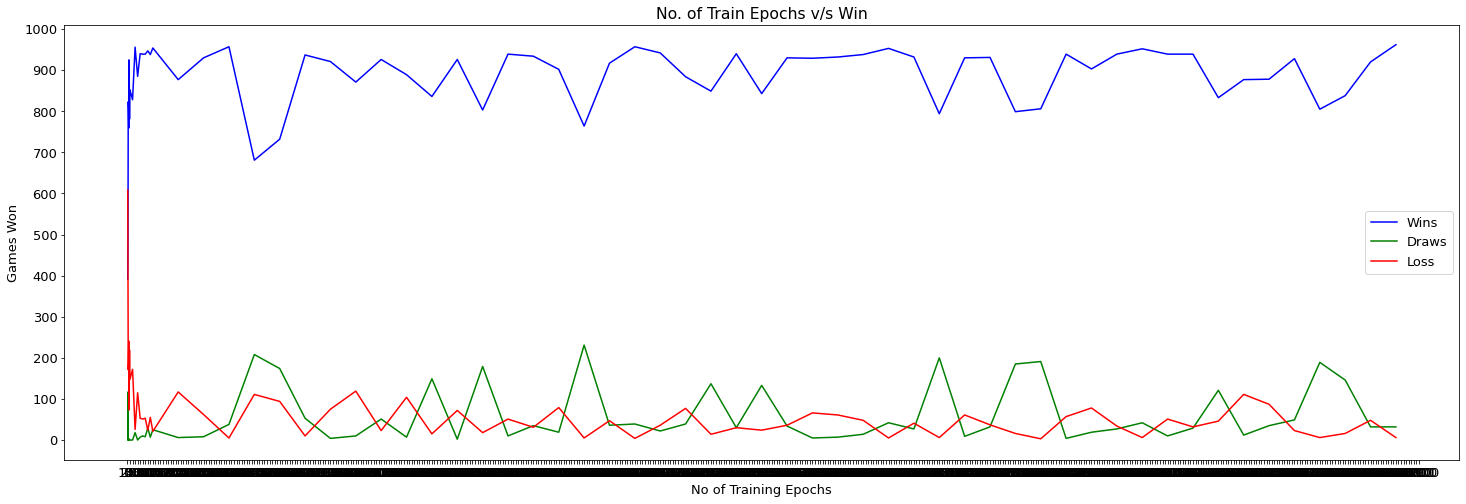

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 25, 8
plt.rcParams['font.size'] = 13

x = np.array(points)
y1 = np.array(r3)[:,0] #wins
y2 = np.array(r3)[:,1] #draws
y3 = np.array(r3)[:,2] #loss
plt.plot(x,y1, label='Wins', color='blue')
#plt.scatter(x,y1)
plt.plot(x,y2, label='Draws',  color='green')
#plt.scatter(x,y2)
plt.plot(x,y3, label='Loss', color='red')
#plt.scatter(x,y3)
plt.xticks(np.arange(0,x[-1]+1000, step=100),)
plt.yticks(np.arange(0,1000+10, step=100),)
plt.xlabel('No of Training Epochs')
plt.ylabel('Games Won')
plt.title('No. of Train Epochs v/s Win')
plt.legend()
plt.show()

In [ ]:
r3

[(200, 276, 524),
 (169, 72, 759),
 (419, 80, 501),
 (216, 257, 527),
 (844, 8, 148),
 (704, 128, 168),
 (783, 52, 165),
 (704, 53, 243),
 (728, 23, 249),
 (754, 0, 246),
 (868, 0, 132),
 (675, 0, 325),
 (834, 0, 166),
 (778, 0, 222),
 (853, 0, 147),
 (811, 0, 189),
 (789, 0, 211),
 (895, 26, 79),
 (947, 23, 30),
 (757, 0, 243),
 (827, 12, 161),
 (816, 0, 184),
 (898, 40, 62),
 (946, 18, 36),
 (756, 0, 244),
 (889, 31, 80),
 (917, 11, 72),
 (822, 145, 33),
 (840, 4, 156),
 (941, 40, 19),
 (752, 96, 152),
 (788, 0, 212),
 (908, 42, 50),
 (777, 0, 223),
 (852, 76, 72),
 (476, 386, 138),
 (780, 0, 220),
 (785, 8, 207),
 (851, 32, 117),
 (665, 0, 335),
 (870, 44, 86),
 (935, 47, 18),
 (450, 435, 115),
 (864, 0, 136),
 (821, 8, 171),
 (806, 55, 139),
 (886, 0, 114),
 (424, 440, 136),
 (835, 60, 105),
 (856, 41, 103),
 (929, 11, 60),
 (892, 3, 105),
 (944, 25, 31),
 (908, 8, 84),
 (490, 463, 47),
 (830, 9, 161),
 (849, 0, 151),
 (821, 53, 126),
 (931, 54, 15),
 (382, 485, 133),
 (858, 48, 94

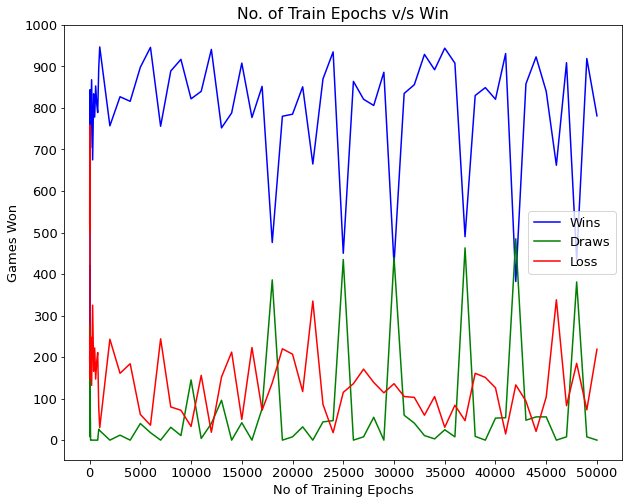

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.size'] = 13

x = np.array(points)
y1 = np.array(r3)[:,0] #wins
y2 = np.array(r3)[:,1] #draws
y3 = np.array(r3)[:,2] #loss
plt.plot(x,y1, label='Wins', color='blue')
#plt.scatter(x,y1)
plt.plot(x,y2, label='Draws',  color='green')
#plt.scatter(x,y2)
plt.plot(x,y3, label='Loss', color='red')
#plt.scatter(x,y3)
plt.xticks(np.arange(0,x[-1]+1000, step=5000),)
plt.yticks(np.arange(0,1000+10, step=100),)
plt.xlabel('No of Training Epochs')
plt.ylabel('Games Won')
plt.title('No. of Train Epochs v/s Win')
plt.legend()
plt.show()

In [ ]:
#points = [10,50,100,200,300,500,600,700,800,900,1000,
 #         2000,3000,4000,5000,6000,7000,8000,9000,10000] 
points = list(np.arange(10,100,10))
b = list(np.arange(100,1000,100))
c = list(np.arange(1000,10000,1000))
d = list(np.arange(10000,50001,1000))
points.extend(b)
points.extend(c)
points.extend(d) 
tw4, wp = train(4,50000,points)      # 1 hr 26 min

In [ ]:
r4=[]
for w in wp:
  r4.append(testGame(w, 4, 100))

In [ ]:
r4

[(2, 98, 0),
 (1, 99, 0),
 (0, 100, 0),
 (1, 99, 0),
 (0, 100, 0),
 (1, 99, 0),
 (0, 100, 0),
 (0, 100, 0),
 (2, 98, 0),
 (0, 100, 0),
 (17, 83, 0),
 (97, 1, 2),
 (96, 2, 2),
 (94, 6, 0),
 (95, 4, 1),
 (95, 4, 1),
 (96, 2, 2),
 (97, 2, 1),
 (94, 4, 2),
 (88, 8, 4),
 (84, 16, 0),
 (97, 3, 0),
 (57, 43, 0),
 (91, 8, 1),
 (94, 4, 2),
 (38, 62, 0),
 (80, 14, 6),
 (98, 1, 1),
 (91, 9, 0),
 (89, 11, 0),
 (98, 2, 0),
 (95, 5, 0),
 (94, 5, 1),
 (78, 22, 0),
 (93, 7, 0),
 (92, 6, 2),
 (90, 10, 0),
 (97, 1, 2),
 (30, 70, 0),
 (89, 11, 0),
 (97, 3, 0),
 (84, 15, 1),
 (93, 5, 2),
 (90, 10, 0),
 (94, 6, 0),
 (95, 4, 1),
 (94, 6, 0),
 (94, 5, 1),
 (0, 100, 0),
 (95, 5, 0),
 (96, 4, 0),
 (97, 3, 0),
 (95, 5, 0),
 (87, 9, 4),
 (94, 6, 0),
 (67, 33, 0),
 (0, 100, 0),
 (94, 6, 0),
 (38, 60, 2),
 (92, 4, 4),
 (95, 3, 2),
 (93, 5, 2),
 (94, 3, 3),
 (95, 3, 2),
 (94, 5, 1),
 (89, 10, 1),
 (95, 5, 0),
 (97, 3, 0)]

In [ ]:
len(wp)

In [ ]:
tw5, wp

In [ ]:
for w in wp:
  print(w)

In [ ]:
r=[]
for w in wp:
  r.append(testGame(w, 4, 100))

In [ ]:
r

In [ ]:
tw4_, wp4_ = train(4,10000,points)  #14 min

In [ ]:
r4=[]
for w in wp4_:
  r4.append(testGame(w, 4, 100))

In [ ]:
r4

[(8, 79, 13),
 (8, 72, 20),
 (10, 78, 12),
 (3, 90, 7),
 (1, 98, 1),
 (1, 76, 23),
 (0, 34, 66),
 (11, 16, 73),
 (10, 8, 82),
 (15, 3, 82),
 (0, 81, 19),
 (41, 2, 57),
 (2, 95, 3),
 (1, 98, 1),
 (0, 100, 0),
 (0, 100, 0),
 (1, 97, 2),
 (0, 100, 0),
 (1, 97, 2),
 (0, 100, 0),
 (0, 99, 1),
 (0, 98, 2),
 (0, 100, 0),
 (0, 100, 0),
 (1, 98, 1),
 (0, 100, 0),
 (0, 92, 8),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (13, 77, 10),
 (0, 100, 0),
 (1, 99, 0),
 (1, 99, 0),
 (4, 95, 1),
 (1, 99, 0),
 (4, 96, 0),
 (8, 92, 0),
 (8, 92, 0),
 (0, 100, 0),
 (22, 78, 0),
 (2, 98, 0),
 (2, 98, 0),
 (26, 73, 1),
 (0, 100, 0),
 (6, 94, 0),
 (9, 91, 0),
 (7, 93, 0),
 (1, 99, 0),
 (0, 100, 0),
 (2, 98, 0),
 (13, 87, 0),
 (1, 99, 0),
 (0, 100, 0),
 (2, 98, 0),
 (8, 92, 0),
 (1, 99, 0),
 (1, 99, 0),
 (14, 86, 0),
 (2, 98, 0),
 (28, 72, 0),
 (10, 90, 0),
 (0, 100, 0),
 (12, 88, 0),
 (29, 68, 3),
 (1, 99, 0),
 (1, 99, 0),
 (0, 100, 0)]

In [ ]:
points = list(np.arange(10,100,10))
b = list(np.arange(100,1000,100))
c = list(np.arange(1000,10000,1000))
d = list(np.arange(10000,50001,1000))
points.extend(b)
points.extend(c)
points.extend(d) 
tw5_, wp5_ = train(5,5000,points) #49 min 41 sec #22 min

[0, 0.3658068809696994, 0.45967288337998724, 0.4296281950339639, 0.30222800744342126, 0.4458422633249881, 0.6763419329957365, 0.7398909595217288, 0.056892831451007986, 0.021355787120443614, 0.996572699856613]

Initializing the Game. MyPlayer is :  X


X 's Turn
---------
Called from game: Using Weights =  [0, 0.3658068809696994, 0.45967288337998724, 0.4296281950339639, 0.30222800744342126, 0.4458422633249881, 0.6763419329957365, 0.7398909595217288, 0.056892831451007986, 0.021355787120443614, 0.996572699856613]
O 's Turn
---------
X 's Turn
---------
Called from game: Using Weights =  [0, 0.3658068809696994, 0.45967288337998724, 0.4296281950339639, 0.30222800744342126, 0.4458422633249881, 0.6763419329957365, 0.7398909595217288, 0.056892831451007986, 0.021355787120443614, 0.996572699856613]
O 's Turn
---------
X 's Turn
---------
Called from game: Using Weights =  [0, 0.3658068809696994, 0.45967288337998724, 0.4296281950339639, 0.30222800744342126, 0.4458422633249881, 0.6763419329957365,

KeyboardInterrupt: ignored

In [ ]:
for w in wp5_:
  print(w)

In [ ]:
r5=[]
for w in wp5_:
  r5.append(testGame(w, 5, 100)) #12 min 17 sec

In [ ]:
r5

[(0, 100, 0),
 (1, 99, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (0, 100, 0),
 (1, 99, 0),
 (1, 99, 0),
 (2, 98, 0),
 (0, 100, 0),
 (95, 5, 0),
 (75, 24, 1),
 (98, 2, 0),
 (99, 1, 0)]

In [ ]:
r5

[(15, 83, 2),
 (65, 33, 2),
 (51, 11, 38),
 (56, 35, 9),
 (73, 23, 4),
 (70, 30, 0),
 (45, 48, 7),
 (76, 21, 3),
 (74, 22, 4),
 (95, 4, 1),
 (98, 1, 1),
 (81, 18, 1),
 (96, 4, 0),
 (98, 2, 0),
 (98, 2, 0),
 (96, 4, 0),
 (98, 2, 0),
 (97, 3, 0),
 (99, 1, 0),
 (96, 4, 0),
 (99, 1, 0),
 (76, 24, 0),
 (96, 4, 0)]

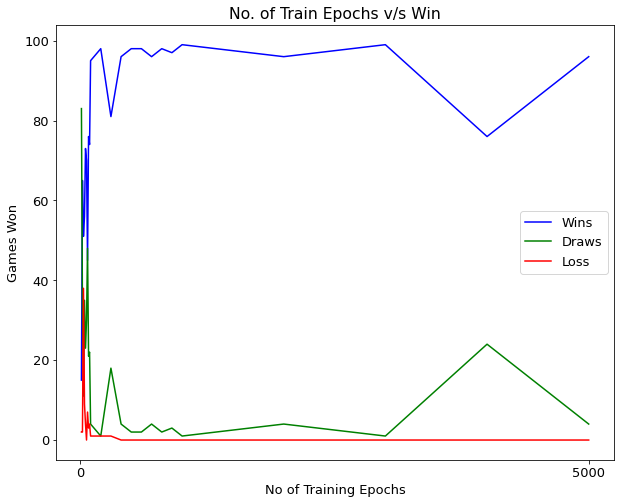

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.size'] = 13

x = np.array(points[:23])
y1 = np.array(r5)[:,0] #wins
y2 = np.array(r5)[:,1] #draws
y3 = np.array(r5)[:,2] #loss
plt.plot(x,y1, label='Wins', color='blue')
#plt.scatter(x,y1)
plt.plot(x,y2, label='Draws',  color='green')
#plt.scatter(x,y2)
plt.plot(x,y3, label='Loss', color='red')
#plt.scatter(x,y3)
plt.xticks(np.arange(0,x[-1]+1000, step=5000),)
#plt.yticks(np.arange(0,1000+10, step=100),)
plt.xlabel('No of Training Epochs')
plt.ylabel('Games Won')
plt.title('No. of Train Epochs v/s Win')
plt.legend()
plt.show()

--------

In [ ]:
weights[3]=[[-0.14330236625042525, 2.87484844590908, -0.6028163503289835, 4.420731558300483, -1.752890162781028, 3.428671441213189, -4.83269555742315],
[-3.946672732978586, 3.4534633439286484, -1.6940039677906666, 13.719168265103974, -0.6954413664869461, 8.572738085842792, -24.883092539169304],
[-7.645074098116477, 2.84016974386752, 0.9969000364684593, 23.297314282948662, 1.3069640330005587, 9.048034480940373, -42.21281618767107],
[-4.7788162219551396, 6.517819018060618, 0.6261556740332297, 82.13109410681865, -9.407695392764447, -8.132157294908835, -86.14819237381685],
[-3.5180493797761043, 16.247058980873287, 5.675718879324889, 100.16268563586344, -12.503590403927149, -42.285642887491186, -85.85242024615545],
[-3.624878984863048, 12.651216933305552, 10.84815801979994, 104.81018716462138, -10.711945253849459, -49.329957185416845, -89.43815065906001],
[-0.3327864872708181, 15.561487661006414, 9.454529163215346, 98.01375101711209, -11.93476897958186, -48.56751871605402, -97.9246523493394],
[-1.0876257008455281, 12.99421722493584, 8.414128769035102, 100.40890830782472, -12.623172954854248, -41.8460658837074, -100.4987330271021],
]

In [ ]:
for i in range(8):
  print(weights[3][i])

[-0.14330236625042525, 2.87484844590908, -0.6028163503289835, 4.420731558300483, -1.752890162781028, 3.428671441213189, -4.83269555742315]
[-3.946672732978586, 3.4534633439286484, -1.6940039677906666, 13.719168265103974, -0.6954413664869461, 8.572738085842792, -24.883092539169304]
[-7.645074098116477, 2.84016974386752, 0.9969000364684593, 23.297314282948662, 1.3069640330005587, 9.048034480940373, -42.21281618767107]
[-4.7788162219551396, 6.517819018060618, 0.6261556740332297, 82.13109410681865, -9.407695392764447, -8.132157294908835, -86.14819237381685]
[-3.5180493797761043, 16.247058980873287, 5.675718879324889, 100.16268563586344, -12.503590403927149, -42.285642887491186, -85.85242024615545]
[-3.624878984863048, 12.651216933305552, 10.84815801979994, 104.81018716462138, -10.711945253849459, -49.329957185416845, -89.43815065906001]
[-0.3327864872708181, 15.561487661006414, 9.454529163215346, 98.01375101711209, -11.93476897958186, -48.56751871605402, -97.9246523493394]
[-1.087625700845

In [ ]:
n=4
for epoch1 in maxIter1:
        #for epoch2 in maxIter2: 
            tw = train(n,epoch1) 
            weights[n].append(tw)#26 min 28 sec

In [ ]:
weights[4]=[[-0.34779020480153167, 0.892092106127805, 0.5044987646239921, 2.9278087579283336, 0.5, 0.07894567789084196, 0.6011946421083361, 6.034787268959434, -6.598779725077432],
[-0.3750992796569049, 0.746173686252579, 0.7822506233848876, 0.24437057148046892, 6.365197709115661, -0.3409706650242268, -0.825606440991859, 9.622610257862046, -11.199419023920935],
[0.07285217434659576, 0.049006291435631295, -0.5106211982915985, -2.2633691091952253, 4.58444390535551, -0.15085202133972003, -0.7633489792927408, 3.3213577331997457, -2.5277039648790596],
[-0.6176999889727477, 0.2438866051855934, 0.26466061895375054, -3.0746802784292186, 34.828211724273295, -0.07433384287296146, -0.519451998557723, 4.4720055074946545, -83.06397537488907],
[-0.07783432874457998, 0.006139375451525808, -0.25944770124531524, -5.777943962246345, 32.60614934706348, -0.05260932505190867, -0.2656064505015258, 3.338591613214426, -78.56934087615251],
[0.034192495157584595, 0.16800817896442094, 0.06784435642293554, -4.129091777180783, 55.96359344593528, -0.10425913082620618, -0.5253841626450467, -4.47484964101458, -90.09583065091438],
[-1.6321734653270281, 0.879097130004375, 0.7141568701068249, -1.4200219279341517, 82.20503783773452, -0.6779185858702294, -1.8110570799027665, 1.1596439058715786, -95.32378182047464],
[0.02725684416248533, -0.003065305872983568, -0.16696487440408642, -1.4523756946542725, 83.51149758098082, -0.01810106260211407, -0.06017798056211817, 0.6250692668925343, -94.1476898684334]]

In [ ]:
for i in range(8):
  print(weights[4][i])

[-0.34779020480153167, 0.892092106127805, 0.5044987646239921, 2.9278087579283336, 0.5, 0.07894567789084196, 0.6011946421083361, 6.034787268959434, -6.598779725077432]
[-0.3750992796569049, 0.746173686252579, 0.7822506233848876, 0.24437057148046892, 6.365197709115661, -0.3409706650242268, -0.825606440991859, 9.622610257862046, -11.199419023920935]
[0.07285217434659576, 0.049006291435631295, -0.5106211982915985, -2.2633691091952253, 4.58444390535551, -0.15085202133972003, -0.7633489792927408, 3.3213577331997457, -2.5277039648790596]
[-0.6176999889727477, 0.2438866051855934, 0.26466061895375054, -3.0746802784292186, 34.828211724273295, -0.07433384287296146, -0.519451998557723, 4.4720055074946545, -83.06397537488907]
[-0.07783432874457998, 0.006139375451525808, -0.25944770124531524, -5.777943962246345, 32.60614934706348, -0.05260932505190867, -0.2656064505015258, 3.338591613214426, -78.56934087615251]
[0.034192495157584595, 0.16800817896442094, 0.06784435642293554, -4.129091777180783, 55.9

In [ ]:
weights[5] = [
[-0.22685341481557497, 0.7950878019737676, 1.5234385565860622, 3.116348613145848, -0.5245052015683821, 1.5004124403510666, 0.3642410090873933, -0.18539964304736867, 0.16137851295708538, 3.614210609789584, -4.678733199206367],
[0.05082186973257272, 0.045134575965240536, 0.047530113082427036, -0.651944106099487, -0.5283627995601728, 3.508994558667566, -0.08022384252515072, -0.48126733953792, -0.4880637626888309, 1.4709860554206962, -0.5195606500402754],
[-0.09463365094594782, 0.022584773000732503, 0.023773018490307926, 0.018636895883492304, -1.693690457363529, 3.518616349601197, -0.04871925683250954, -0.30471216469952933, 1.2811745836123636, 6.366846560513081, -7.601319988038679],
[-0.004608549520843805, 0.0038059727846607564, 0.0013273650844088558, -0.006177965180401809, -1.6276848552079888, 3.5314885010712045, -0.00765600482122131, -0.05076875468861435, 0.4716405588873726, -1.4566865923751382, -0.534378711130113],
[-0.0005215308157260917, 0.0011048015322183931, -0.0009498530983709617, -0.009033979314090126, -1.514989696410659, 3.5000839535379953, -0.002266799193394753, -0.01238781668473166, -0.5766592735907022, -0.6980321157840719, -0.5437251291553724],
[0.005822570325052939, 5.316868516187596e-05, -0.15945670922943017, -0.12627547689831398, -2.7206410652427326, 15.414369304389437, -0.0014841125486113708, -0.011755534354614268, -0.249130905907587, -1.3802064429316458, -78.5805355108588],
[-6.163969778319322e-05, 9.635449454363714e-05, -0.00039609712051605936, -0.001929934903655552, -0.5099130062094148, 1.5056969845380126, -0.00022394969627844935, -0.002157186272808934, -0.34898754252567743, 0.4793414689508423, 0.5],
[2.973392956350306e-05, 0.00019724704868027404, -0.0016424442098858512, -0.004271396995180647, -0.4901497141065024, 1.5004903925230308, -0.00044924292700883187, -0.0024795359097602955, -0.06441344261944494, 0.5079581346793622, -0.5814325307388815]
]

In [ ]:
for i in range(8):
  print(weights[5][i])

[-0.22685341481557497, 0.7950878019737676, 1.5234385565860622, 3.116348613145848, -0.5245052015683821, 1.5004124403510666, 0.3642410090873933, -0.18539964304736867, 0.16137851295708538, 3.614210609789584, -4.678733199206367]
[0.05082186973257272, 0.045134575965240536, 0.047530113082427036, -0.651944106099487, -0.5283627995601728, 3.508994558667566, -0.08022384252515072, -0.48126733953792, -0.4880637626888309, 1.4709860554206962, -0.5195606500402754]
[-0.09463365094594782, 0.022584773000732503, 0.023773018490307926, 0.018636895883492304, -1.693690457363529, 3.518616349601197, -0.04871925683250954, -0.30471216469952933, 1.2811745836123636, 6.366846560513081, -7.601319988038679]
[-0.004608549520843805, 0.0038059727846607564, 0.0013273650844088558, -0.006177965180401809, -1.6276848552079888, 3.5314885010712045, -0.00765600482122131, -0.05076875468861435, 0.4716405588873726, -1.4566865923751382, -0.534378711130113]
[-0.0005215308157260917, 0.0011048015322183931, -0.0009498530983709617, -0.0

In [ ]:
for i in range(8):
  print(weight[3][i])

In [ ]:
n=5
for epoch1 in maxIter1:
        #for epoch2 in maxIter2: 
            tw = train(n,epoch1) 
            weights[n].append(tw)# 1hr 12 min

In [ ]:
weights[6]

[]

In [ ]:
n=6
for epoch1 in maxIter1:
        #for epoch2 in maxIter2: 
            tw = train(n,epoch1) 
            weights[n].append(tw)#26 min 28 sec

In [ ]:
weights[3][0]

[-0.14330236625042525,
 2.87484844590908,
 -0.6028163503289835,
 4.420731558300483,
 -1.752890162781028,
 3.428671441213189,
 -4.83269555742315]

In [ ]:
logs[3]

[]

In [ ]:
n=3
maxIter2 = [10,100,1000]
for i in range(0,8) :
  log=[]
  for epoch2 in maxIter2: 
      result  = testGame(weights[n][i],n,epoch2) 
      log.append(result)
  logs[n].append(log)# 1hr 12 min

In [ ]:
logs[3]= [[(2, 3, 5), (25, 15, 60), (254, 219, 527)],
 [(2, 2, 6), (15, 30, 55), (225, 217, 558)],
 [(6, 0, 4), (47, 7, 46), (460, 65, 475)],
 [(7, 2, 1), (49, 22, 29), (477, 316, 207)],
 [(8, 2, 0), (76, 22, 2), (786, 206, 8)],
 [(9, 1, 0), (77, 21, 2), (784, 204, 12)],
 [(8, 2, 0), (70, 28, 2), (785, 199, 16)],
 [(8, 2, 0), (76, 23, 1), (759, 232, 9)]]
logs[3]

[[(2, 3, 5), (25, 15, 60), (254, 219, 527)],
 [(2, 2, 6), (15, 30, 55), (225, 217, 558)],
 [(6, 0, 4), (47, 7, 46), (460, 65, 475)],
 [(7, 2, 1), (49, 22, 29), (477, 316, 207)],
 [(8, 2, 0), (76, 22, 2), (786, 206, 8)],
 [(9, 1, 0), (77, 21, 2), (784, 204, 12)],
 [(8, 2, 0), (70, 28, 2), (785, 199, 16)],
 [(8, 2, 0), (76, 23, 1), (759, 232, 9)]]

In [ ]:
logs[4]=[[(1, 1, 8), (5, 17, 78), (66, 137, 797)],
 [(2, 7, 1), (5, 86, 9), (60, 881, 59)],
 [(0, 10, 0), (1, 98, 1), (2, 994, 4)],
 [(2, 8, 0), (5, 94, 1), (58, 908, 34)],
 [(0, 10, 0), (0, 98, 2), (2, 971, 27)],
 [(0, 10, 0), (2, 98, 0), (14, 986, 0)],
 [(0, 10, 0), (1, 98, 1), (14, 975, 11)],
 [(0, 9, 1), (0, 87, 13), (0, 909, 91)]]
logs[4]

[[(1, 1, 8), (5, 17, 78), (66, 137, 797)],
 [(2, 7, 1), (5, 86, 9), (60, 881, 59)],
 [(0, 10, 0), (1, 98, 1), (2, 994, 4)],
 [(2, 8, 0), (5, 94, 1), (58, 908, 34)],
 [(0, 10, 0), (0, 98, 2), (2, 971, 27)],
 [(0, 10, 0), (2, 98, 0), (14, 986, 0)],
 [(0, 10, 0), (1, 98, 1), (14, 975, 11)],
 [(0, 9, 1), (0, 87, 13), (0, 909, 91)]]

In [ ]:
n=4
maxIter2 = [10,100,1000]
for i in range(0,8) :
  log=[]
  for epoch2 in maxIter2: 
      result  = testGame(weights[n][i],n,epoch2) 
      log.append(result)
  logs[n].append(log)# 1hr 12 min

In [ ]:
logs[4]

[[(1, 1, 8), (5, 17, 78), (66, 137, 797)],
 [(2, 7, 1), (5, 86, 9), (60, 881, 59)],
 [(0, 10, 0), (1, 98, 1), (2, 994, 4)],
 [(2, 8, 0), (5, 94, 1), (58, 908, 34)],
 [(0, 10, 0), (0, 98, 2), (2, 971, 27)],
 [(0, 10, 0), (2, 98, 0), (14, 986, 0)],
 [(0, 10, 0), (1, 98, 1), (14, 975, 11)],
 [(0, 9, 1), (0, 87, 13), (0, 909, 91)]]

In [ ]:
logs[5]=[[(0, 4, 6), (1, 51, 48), (13, 560, 427)],
 [(0, 10, 0), (2, 98, 0), (19, 981, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)]]
logs[5]

[[(0, 4, 6), (1, 51, 48), (13, 560, 427)],
 [(0, 10, 0), (2, 98, 0), (19, 981, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)]]

In [ ]:
n=5
maxIter2 = [10, 100, 1000]
for i in range(0,8) :
  log=[]
  for epoch2 in maxIter2: 
      result  = testGame(weights[n][i],n,epoch2) 
      log.append(result)
  logs[n].append(log)# 1hr 12 min

In [ ]:
logs[5]

[[(0, 4, 6), (1, 51, 48), (13, 560, 427)],
 [(0, 10, 0), (2, 98, 0), (19, 981, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)],
 [(0, 10, 0), (0, 100, 0), (0, 1000, 0)]]

In [ ]:
weights

In [ ]:
import pandas as pd
index = [10,50,100,500,1000,2500,5000,10000]
columns = [10,100,1000]
pd.DataFrame(logs[3], columns=columns, index=index)

,10,100,1000
10,"(2, 3, 5)","(25, 15, 60)","(254, 219, 527)"
50,"(2, 2, 6)","(15, 30, 55)","(225, 217, 558)"
100,"(6, 0, 4)","(47, 7, 46)","(460, 65, 475)"
500,"(7, 2, 1)","(49, 22, 29)","(477, 316, 207)"
1000,"(8, 2, 0)","(76, 22, 2)","(786, 206, 8)"
2500,"(9, 1, 0)","(77, 21, 2)","(784, 204, 12)"
5000,"(8, 2, 0)","(70, 28, 2)","(785, 199, 16)"
10000,"(8, 2, 0)","(76, 23, 1)","(759, 232, 9)"


In [ ]:
index = [10,50,100,500,1000,2500,5000]
columns = ['WIN','DRAWS','LOSS']
a = pd.DataFrame(np.array(logs[3][:-1])[:,2], columns=columns, index=index)
a['WIN %'] = (a.WIN/1000)*100
a['DRAW %'] = (a.DRAWS/1000)*100
a['LOSS %'] = (a.LOSS/1000)*100
a

NameError: ignored

In [ ]:
index = [10,50,100,500,1000,2500,5000]
columns = ['WIN','DRAWS','LOSS']
b = pd.DataFrame(np.array(logs[4][:-1])[:,2], columns=columns, index=index)
b['WIN %'] = (a.WIN/1000)*100
b['DRAW %'] = (a.DRAWS/1000)*100
b['LOSS %'] = (a.LOSS/1000)*100
b

In [ ]:
index = [10,50,100,500,1000,2500,5000,10000]
columns = [10,100,1000]
pd.DataFrame(logs[4], columns=columns, index=index)

,10,100,1000
10,"(1, 1, 8)","(5, 17, 78)","(66, 137, 797)"
50,"(2, 7, 1)","(5, 86, 9)","(60, 881, 59)"
100,"(0, 10, 0)","(1, 98, 1)","(2, 994, 4)"
500,"(2, 8, 0)","(5, 94, 1)","(58, 908, 34)"
1000,"(0, 10, 0)","(0, 98, 2)","(2, 971, 27)"
2500,"(0, 10, 0)","(2, 98, 0)","(14, 986, 0)"
5000,"(0, 10, 0)","(1, 98, 1)","(14, 975, 11)"
10000,"(0, 9, 1)","(0, 87, 13)","(0, 909, 91)"


In [ ]:
index = [10,50,100,500,1000,2500,5000,10000]
columns = [10,100,1000]
pd.DataFrame(logs[5], columns=columns, index=index)

,10,100,1000
10,"(0, 4, 6)","(1, 51, 48)","(13, 560, 427)"
50,"(0, 10, 0)","(2, 98, 0)","(19, 981, 0)"
100,"(0, 10, 0)","(0, 100, 0)","(0, 1000, 0)"
500,"(0, 10, 0)","(0, 100, 0)","(0, 1000, 0)"
1000,"(0, 10, 0)","(0, 100, 0)","(0, 1000, 0)"
2500,"(0, 10, 0)","(0, 100, 0)","(0, 1000, 0)"
5000,"(0, 10, 0)","(0, 100, 0)","(0, 1000, 0)"
10000,"(0, 10, 0)","(0, 100, 0)","(0, 1000, 0)"


In [ ]:
np.array(logs[3])[:,2][:,0]

array([254, 225, 460, 477, 786, 784, 785, 759])

In [ ]:
logs[3]

[[(2, 3, 5), (25, 15, 60), (254, 219, 527)],
 [(2, 2, 6), (15, 30, 55), (225, 217, 558)],
 [(6, 0, 4), (47, 7, 46), (460, 65, 475)],
 [(7, 2, 1), (49, 22, 29), (477, 316, 207)],
 [(8, 2, 0), (76, 22, 2), (786, 206, 8)],
 [(9, 1, 0), (77, 21, 2), (784, 204, 12)],
 [(8, 2, 0), (70, 28, 2), (785, 199, 16)],
 [(8, 2, 0), (76, 23, 1), (759, 232, 9)]]

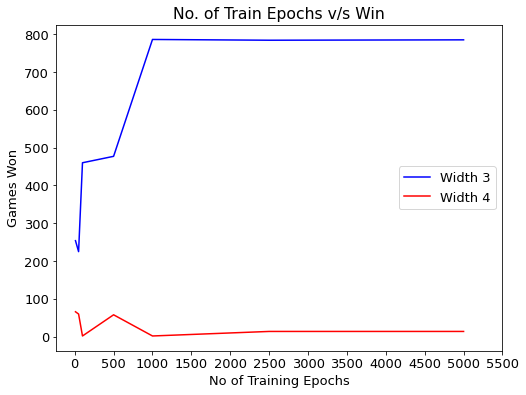

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 13

x = np.array([10,50,100,500,1000,2500,5000])
y1 = np.array(logs[3][:-1])[:,2][:,0] #wins
y2 = np.array(logs[4][:-1])[:,2][:,0]
y3 = np.array(logs[5][:-1])[:,2][:,0]
plt.plot(x,y1, label='Width 3', color='blue')
#plt.scatter(x,y1)
plt.plot(x,y2, label='Width 4',  color='red')
#plt.scatter(x,y2)
#plt.plot(x,y3, label='5 dim', color='red')
#plt.scatter(x,y3)
plt.xticks(np.arange(0,6000, step=500),)
plt.xlabel('No of Training Epochs')
plt.ylabel('Games Won')
plt.title('No. of Train Epochs v/s Win')
plt.legend()
plt.show()

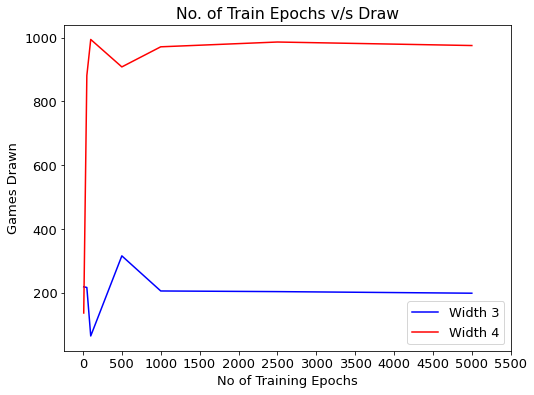

In [ ]:
x = np.array([10,50,100,500,1000,2500,5000])
y1 = np.array(logs[3][:-1])[:,2][:,1] #draws
y2 = np.array(logs[4][:-1])[:,2][:,1]
#y3 = np.array(logs[5])[:,2][:,1]
plt.plot(x,y1, label='Width 3', color='blue')
#plt.scatter(x,y1)
plt.plot(x,y2, label='Width 4', color='red')
#plt.scatter(x,y2)
#plt.plot(x,y3, label='5 dim', color='red')
#plt.scatter(x,y3)
plt.xlabel('No of Training Epochs')
plt.xticks(np.arange(0,6000, step=500),)
plt.ylabel('Games Drawn')
plt.title('No. of Train Epochs v/s Draw')
plt.legend()
plt.show()

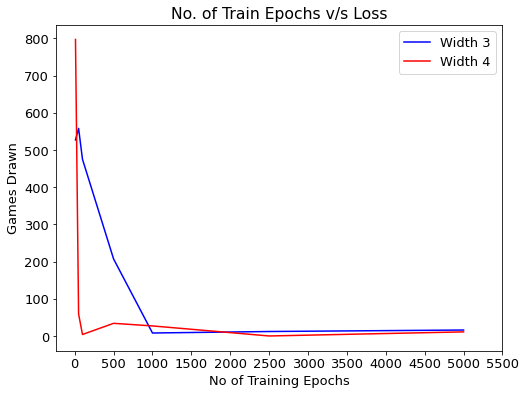

In [ ]:
x = np.array([10,50,100,500,1000,2500,5000])
y1 = np.array(logs[3][:-1])[:,2][:,2] #loss
y2 = np.array(logs[4][:-1])[:,2][:,2]
#y3 = np.array(logs[5])[:,2][:,1]
plt.plot(x,y1, label='Width 3', color='blue')
#plt.scatter(x,y1)
plt.plot(x,y2, label='Width 4', color='red')
#plt.scatter(x,y2)
#plt.plot(x,y3, label='5 dim', color='red')
#plt.scatter(x,y3)
plt.xlabel('No of Training Epochs')
plt.xticks(np.arange(0,6000, step=500),)
plt.ylabel('Games Drawn')
plt.title('No. of Train Epochs v/s Loss')
plt.legend()
plt.show()

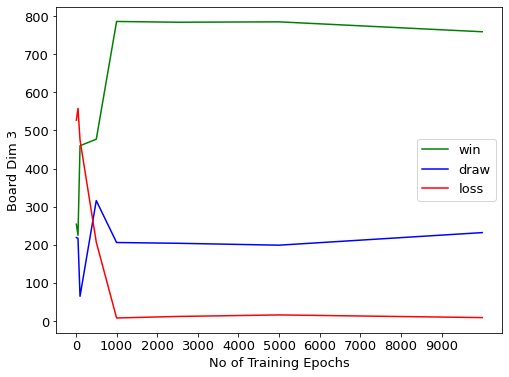

In [ ]:
x = np.array([10,50,100,500,1000,2500,5000,10000])
y1 = np.array(logs[3])[:,2][:,0]
y2 = np.array(logs[3])[:,2][:,1]
y3 = np.array(logs[3])[:,2][:,2]
plt.plot(x,y1, label='win', color='green')
#plt.scatter(x,y1, color='green')
plt.plot(x,y2, label='draw', color='blue')
#plt.scatter(x,y2, color='blue')
plt.plot(x,y3, label='loss', color='red')
#plt.scatter(x,y3, color='red')
plt.xlabel('No of Training Epochs')
plt.xticks(np.arange(0,10000, step=1000),)
plt.ylabel('Board Dim 3')
plt.legend()
plt.show()

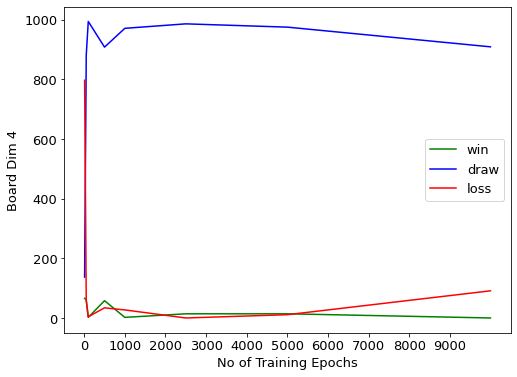

In [ ]:
x = np.array([10,50,100,500,1000,2500,5000,10000])
y1 = np.array(logs[4])[:,2][:,0]
y2 = np.array(logs[4])[:,2][:,1]
y3 = np.array(logs[4])[:,2][:,2]
plt.plot(x,y1, label='win', color='green')
#plt.scatter(x,y1, color='green')
plt.plot(x,y2, label='draw', color='blue')
#plt.scatter(x,y2, color='blue')
plt.plot(x,y3, label='loss', color='red')
#plt.scatter(x,y3, color='red')
plt.xlabel('No of Training Epochs')
plt.xticks(np.arange(0,10000, step=1000),)
plt.ylabel('Board Dim 4')
plt.legend()
plt.show()

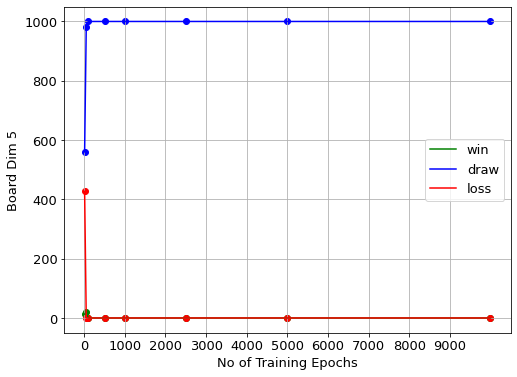

In [ ]:
index = [10,50,100,500,1000,2500,5000,10000]
columns = [10,100,1000]
pd.DataFrame(logs[4], columns=columns, index=index)x = np.array([10,50,100,500,1000,2500,5000,10000])
y1 = np.array(logs[5])[:,2][:,0]
y2 = np.array(logs[5])[:,2][:,1]
y3 = np.array(logs[5])[:,2][:,2]
plt.plot(x,y1, label='win', color='green')
plt.scatter(x,y1, color='green')
plt.plot(x,y2, label='draw', color='blue')
plt.scatter(x,y2, color='blue')
plt.plot(x,y3, label='loss', color='red')
plt.scatter(x,y3, color='red')
plt.xlabel('No of Training Epochs')
plt.xticks(np.arange(0,10000, step=1000),)
plt.ylabel('Board Dim 5')
plt.legend()
plt.show()

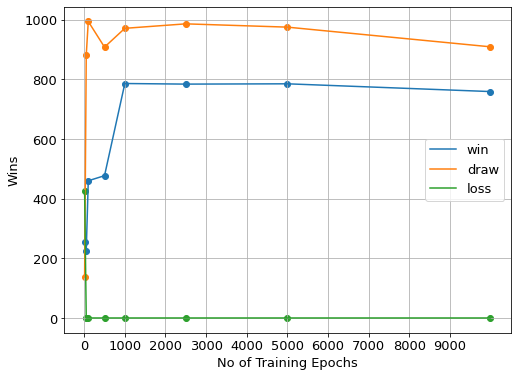

In [ ]:
x = np.array([10,50,100,500,1000,2500,5000,10000])
y1 = np.array(logs[3])[:,2][:,0]
y2 = np.array(logs[4])[:,2][:,1]
y3 = np.array(logs[5])[:,2][:,2]
plt.plot(x,y1, label='win')
plt.scatter(x,y1)
plt.plot(x,y2, label='draw')
plt.scatter(x,y2)
plt.plot(x,y3, label='loss')
plt.scatter(x,y3)
plt.xlabel('No of Training Epochs')
plt.xticks(np.arange(0,10000, step=1000),)
plt.ylabel('Wins')
plt.legend()
plt.show()

In [ ]:
from matplotlib.ticker import PercentFormatter

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [ ]:
logs[3]

[[(2, 3, 5), (25, 15, 60), (254, 219, 527)],
 [(2, 2, 6), (15, 30, 55), (225, 217, 558)],
 [(6, 0, 4), (47, 7, 46), (460, 65, 475)],
 [(7, 2, 1), (49, 22, 29), (477, 316, 207)],
 [(8, 2, 0), (76, 22, 2), (786, 206, 8)],
 [(9, 1, 0), (77, 21, 2), (784, 204, 12)],
 [(8, 2, 0), (70, 28, 2), (785, 199, 16)],
 [(8, 2, 0), (76, 23, 1), (759, 232, 9)]]

In [ ]:
np.array(logs[3])[-1][:,0]/np.array([10,100,1000])

array([0.8  , 0.76 , 0.759])